<a href="https://colab.research.google.com/github/Ashubapun/Customer-Churn-Prediction/blob/main/CCP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [163]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [165]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [166]:
df.shape

(7043, 21)

In [167]:
df.duplicated().sum()

0

In [168]:
df = df.drop(df[df['TotalCharges'] == ' '].index, axis = 0)

In [169]:
df['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [170]:
df['Partner'].value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

In [171]:
df['Dependents'].value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

In [172]:
df['MultipleLines'].value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [173]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [174]:
df['OnlineSecurity'].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

In [175]:
df['OnlineBackup'].value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

In [176]:
df['DeviceProtection'].value_counts()

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

In [177]:
df['TechSupport'].value_counts()

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

In [178]:
df['StreamingTV'].value_counts()

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

In [179]:
df['MonthlyCharges'] = df['MonthlyCharges'].astype('float')

In [180]:
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [181]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

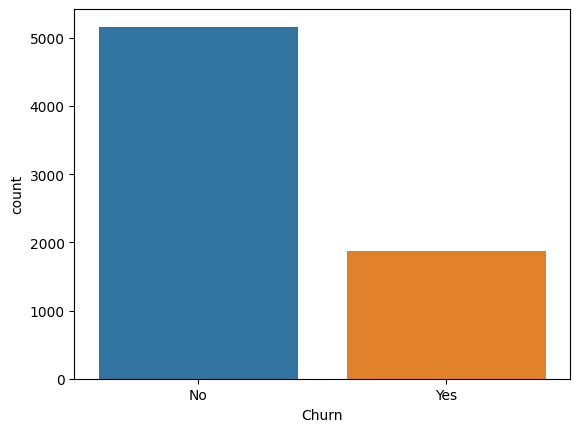

In [182]:
sns.countplot(data = df, x = df['Churn'])

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [184]:
df_new = pd.get_dummies(df,columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'],drop_first=True)

In [185]:
df_new.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,No,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,34,56.95,1889.50,No,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,Yes,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,45,42.30,1840.75,No,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,2,70.70,151.65,Yes,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [186]:
df_x = df_new.drop(columns = ['customerID', 'Churn'])
df_x.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [187]:
df_y =  df_new['Churn']
df_y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

In [188]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_y = le.fit_transform(df_y)

In [189]:
df_y

array([0, 0, 1, ..., 0, 1, 0])

In [190]:
from imblearn.combine import SMOTETomek
# # Implementing Oversampling for Handling Imbalanced 
smt = SMOTETomek(random_state=42)
x, y = smt.fit_resample(df_x,df_y)

In [191]:
x.shape

(9484, 30)

In [192]:
y.shape

(9484,)

In [193]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 21, test_size = 0.3)

In [194]:
x_train.shape, y_train.shape

((6638, 30), (6638,))

In [195]:
x_test.shape, y_test.shape

((2846, 30), (2846,))

In [196]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [197]:
model = Sequential()
model.add(Dense(30,activation='relu',input_dim=30))
model.add(Dense(1,activation='sigmoid'))

In [198]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                930       
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [199]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [200]:
history = model.fit(x_train,y_train,batch_size=50,epochs=50, verbose=1,validation_split=0.2)

Epoch 1/50
107/107 [==============================] - 1s 4ms/step - loss: 64.7040 - accuracy: 0.5655 - val_loss: 1.9318 - val_accuracy: 0.5008
Epoch 2/50
107/107 [==============================] - 0s 3ms/step - loss: 0.8056 - accuracy: 0.7303 - val_loss: 0.4760 - val_accuracy: 0.7764
Epoch 3/50
107/107 [==============================] - 0s 3ms/step - loss: 0.7144 - accuracy: 0.7416 - val_loss: 0.5633 - val_accuracy: 0.7681
Epoch 4/50
107/107 [==============================] - 0s 3ms/step - loss: 0.5948 - accuracy: 0.7680 - val_loss: 0.4073 - val_accuracy: 0.8110
Epoch 5/50
107/107 [==============================] - 0s 3ms/step - loss: 0.5599 - accuracy: 0.7772 - val_loss: 0.5844 - val_accuracy: 0.7417
Epoch 6/50
107/107 [==============================] - 0s 3ms/step - loss: 0.4796 - accuracy: 0.7898 - val_loss: 0.4312 - val_accuracy: 0.8057
Epoch 7/50
107/107 [==============================] - 0s 3ms/step - loss: 0.5250 - accuracy: 0.7857 - val_loss: 0.3924 - val_accuracy: 0.8245
Epoch

In [201]:
model.layers[0].get_weights()

[array([[-1.02291971e-01, -2.19526827e-01, -9.57768783e-02,
          1.31425947e-01,  1.42040431e-01,  3.70743871e-03,
         -2.16785222e-01,  3.08477908e-01,  1.25409737e-01,
          1.83740377e-01,  1.98928669e-01, -1.64205749e-02,
         -2.20911935e-01,  4.14741397e-01, -6.19270802e-02,
         -1.83478892e-01,  3.01910490e-01, -2.04041004e-01,
          1.49866328e-01,  1.79963484e-01, -6.33212179e-02,
          2.80203074e-01,  8.50792229e-02, -1.17932983e-01,
          1.09210461e-01, -8.26376677e-02,  1.57736421e-01,
         -1.54243961e-01, -1.01934262e-01, -3.92681956e-02],
        [-6.15050793e-02, -2.51384497e-01,  3.18108171e-01,
         -2.38584548e-01, -3.15259457e-01,  3.35867107e-02,
          1.73927873e-01,  1.15828395e-01,  1.45970151e-01,
         -1.01525702e-01,  1.93663388e-01,  2.72648782e-01,
          2.48995926e-02,  2.78536886e-01, -3.03952932e-01,
         -9.36325546e-03, -1.20528787e-01, -1.67398125e-01,
          1.46784661e-02,  1.63506836e-

In [202]:
model.layers[1].get_weights()

[array([[-0.13703558],
        [-0.02768084],
        [ 0.05565709],
        [ 0.10852224],
        [-0.08923763],
        [-0.397748  ],
        [ 0.17951521],
        [ 0.27391362],
        [-0.22625546],
        [-0.1097424 ],
        [ 0.23000659],
        [-0.1918987 ],
        [ 0.17479996],
        [ 0.38580623],
        [ 0.22979093],
        [-0.35658664],
        [ 0.32850915],
        [-0.11284465],
        [-0.45972937],
        [ 0.31382135],
        [-0.26858076],
        [-0.37147313],
        [-0.12527382],
        [ 0.23051576],
        [-0.05015701],
        [-0.21234827],
        [ 0.10558298],
        [ 0.05228975],
        [ 0.4402855 ],
        [-0.2754212 ]], dtype=float32),
 array([0.01831207], dtype=float32)]

In [203]:
y_pred = model.predict(x_test)
y_pred

89/89 [==============================] - 0s 1ms/step


array([[8.5788900e-01],
       [9.8094606e-01],
       [8.8408770e-04],
       ...,
       [5.6802309e-01],
       [2.5844849e-03],
       [9.7030503e-01]], dtype=float32)

In [204]:
y_pred = np.where(y_pred>0.5, 1, 0)
y_pred

array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [205]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.8376669009135629

In [206]:
model = Sequential()
model.add(Dense(30,activation='relu',input_dim=30))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=50,epochs=100, verbose=1,validation_split=0.2)

Epoch 1/100
107/107 [==============================] - 1s 4ms/step - loss: 6.9222 - accuracy: 0.5687 - val_loss: 0.7498 - val_accuracy: 0.6965
Epoch 2/100
107/107 [==============================] - 0s 3ms/step - loss: 0.5883 - accuracy: 0.7232 - val_loss: 0.8932 - val_accuracy: 0.6295
Epoch 3/100
107/107 [==============================] - 0s 3ms/step - loss: 0.6212 - accuracy: 0.7324 - val_loss: 1.2639 - val_accuracy: 0.7048
Epoch 4/100
107/107 [==============================] - 0s 4ms/step - loss: 0.6478 - accuracy: 0.7386 - val_loss: 0.6394 - val_accuracy: 0.7455
Epoch 5/100
107/107 [==============================] - 0s 4ms/step - loss: 0.5563 - accuracy: 0.7588 - val_loss: 0.4821 - val_accuracy: 0.7801
Epoch 6/100
107/107 [==============================] - 0s 4ms/step - loss: 0.6220 - accuracy: 0.7405 - val_loss: 0.4381 - val_accuracy: 0.7914
Epoch 7/100
107/107 [==============================] - 1s 5ms/step - loss: 0.4805 - accuracy: 0.7783 - val_loss: 0.6177 - val_accuracy: 0.7560

In [207]:
y_pred1 = model.predict(x_test)
y_pred1 = np.where(y_pred1>0.5, 1, 0)
accuracy_score(y_test,y_pred1)

89/89 [==============================] - 0s 1ms/step


0.8004216444132115

In [208]:
model = Sequential()
model.add(Dense(30,activation='relu',input_dim=30))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=50,epochs=100, verbose=1,validation_split=0.2)

Epoch 1/100
107/107 [==============================] - 1s 5ms/step - loss: 6.1915 - accuracy: 0.6305 - val_loss: 0.8856 - val_accuracy: 0.6965
Epoch 2/100
107/107 [==============================] - 0s 3ms/step - loss: 0.9120 - accuracy: 0.7218 - val_loss: 0.4479 - val_accuracy: 0.7929
Epoch 3/100
107/107 [==============================] - 0s 3ms/step - loss: 0.9648 - accuracy: 0.7301 - val_loss: 0.4439 - val_accuracy: 0.8005
Epoch 4/100
107/107 [==============================] - 0s 3ms/step - loss: 0.7469 - accuracy: 0.7542 - val_loss: 1.0364 - val_accuracy: 0.6980
Epoch 5/100
107/107 [==============================] - 0s 3ms/step - loss: 0.5613 - accuracy: 0.7733 - val_loss: 0.4630 - val_accuracy: 0.8020
Epoch 6/100
107/107 [==============================] - 0s 2ms/step - loss: 0.9488 - accuracy: 0.7452 - val_loss: 1.5130 - val_accuracy: 0.6709
Epoch 7/100
107/107 [==============================] - 0s 3ms/step - loss: 0.8067 - accuracy: 0.7582 - val_loss: 0.4658 - val_accuracy: 0.7967

In [209]:
y_pred2 = model.predict(x_test)
y_pred2 = np.where(y_pred2>0.5, 1, 0)
accuracy_score(y_test,y_pred2)

89/89 [==============================] - 0s 1ms/step


0.8418833450456782